In [1]:
from sklearn.model_selection import train_test_split
from glob import glob
from scipy.signal import butter, lfilter, convolve, boxcar
from scipy.signal import freqz
from scipy.fftpack import fft, ifft
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler,MinMaxScaler

import numpy as np
import pywt
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import os

In [2]:
def prepare_data_train(fname):
    """ read and prepare training data """
    # Read data
    data = pd.read_csv(fname)
    # events file
    events_fname = fname.replace('_data','_events')
    # read event file
    labels= pd.read_csv(events_fname)
    clean=data.drop(['id' ], axis=1)#remove id
    labels=labels.drop(['id' ], axis=1)#remove id
    return  clean,labels

In [3]:
from glob import glob
import pandas as pd

In [4]:
def prepare_data_test(fname):
    #fnames =  sorted(glob('C:\\Users\\saara\\train/subj%d_series*_data.csv' % (subject)))
        #  """ read and prepare test data """
    # Read data
    data = pd.read_csv(fname)
    return data

In [5]:
def butter_bandpass_filter(data, lowcut, highcut, fs):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq

    b, a = butter(12, [low, high], btype='band')
    y = lfilter(b, a, data)
    return y

In [7]:
scaler= StandardScaler()
def data_normaliz(X):
    X_prep=scaler.fit_transform(X)
    #do here your preprocessing
    return X_prep

In [8]:
subjects = range(1,6)
y_raw= []
raw = []
y_rawt= []
rawt = []

In [9]:
################ READ DATA #############################
for subject in subjects:
    
    fnames =  sorted(glob('C:\\Users\\saara\\SUB1-6 train/subj%d_series*_data.csv' % (subject)))

    for fname in fnames:
        data,labels=prepare_data_train(fname)
        raw.append(data)
        y_raw.append(labels)

    for fname in fnames:
        with open(fname) as myfile:
            head = [next(myfile) for x in range(10)]
               
X = pd.concat(raw)
y = pd.concat(y_raw)
#transform in numpy array
#transform train data in numpy array
X_train =np.asarray(X.astype(float))
y_train = np.asarray(y.astype(float))

In [10]:
x_filter=butter_bandpass_filter(X_train,7,30,500)


In [11]:
X_train


array([[ 192.,  230.,  573.,  348.,  383.,  105.],
       [ 201.,  233.,  554.,  327.,  369.,   78.],
       [ 198.,  207.,  542.,  319.,  355.,   66.],
       ...,
       [ 162., -233.,   51., -106.,  -98.,  -46.],
       [ 135., -229.,   70., -123., -105.,  -36.],
       [ 144., -228.,   56., -148., -129.,  -62.]])

In [12]:
x_filter


array([[5.69638103e-09, 1.28858902e-07, 1.45426292e-06, 1.09391314e-05,
        6.18019620e-05, 2.80095090e-04],
       [5.96339889e-09, 1.34668304e-07, 1.51612515e-06, 1.13693241e-05,
        6.40004148e-05, 2.88897148e-04],
       [5.87439293e-09, 1.31990120e-07, 1.47907050e-06, 1.10457202e-05,
        6.19600099e-05, 2.78880148e-04],
       ...,
       [4.80632149e-09, 9.60543302e-08, 9.42762847e-07, 6.07144180e-06,
        2.89122286e-05, 1.08709778e-04],
       [4.00526791e-09, 7.90118172e-08, 7.64311543e-07, 4.84175384e-06,
        2.26196375e-05, 8.31240280e-05],
       [4.27228577e-09, 8.47618817e-08, 8.25050917e-07, 5.26155720e-06,
        2.47549354e-05, 9.16390238e-05]])

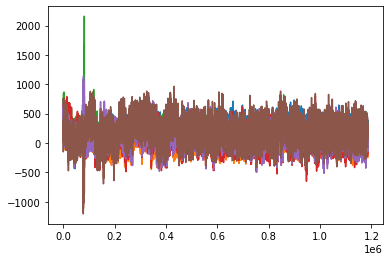

In [13]:
plt.plot(X_train)


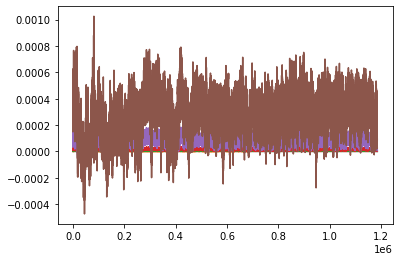

In [14]:
plt.plot(x_filter)


In [15]:
x_filter_normaliz=data_normaliz(x_filter)


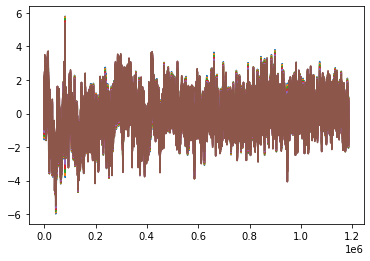

In [16]:
plt.plot(x_filter_normaliz)


In [17]:
# access first col , electrode C3 
x_filter_normaliz[:,0]

array([-0.71474932, -0.6392347 , -0.66440624, ..., -0.96646473,
       -1.1930086 , -1.11749397])

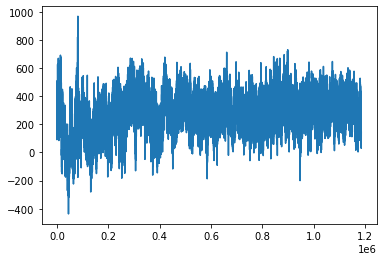

In [18]:
plt.plot(X_train[:,0])


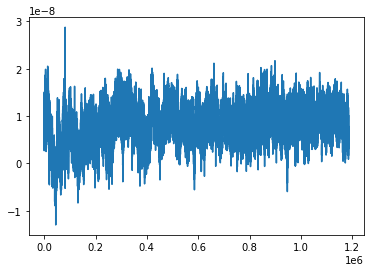

In [19]:
plt.plot(x_filter[:,0])


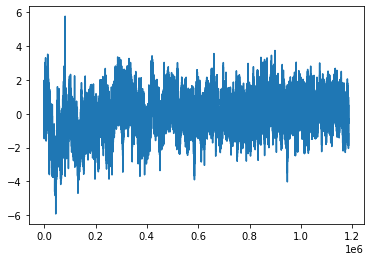

In [20]:
plt.plot(x_filter_normaliz[:,1])


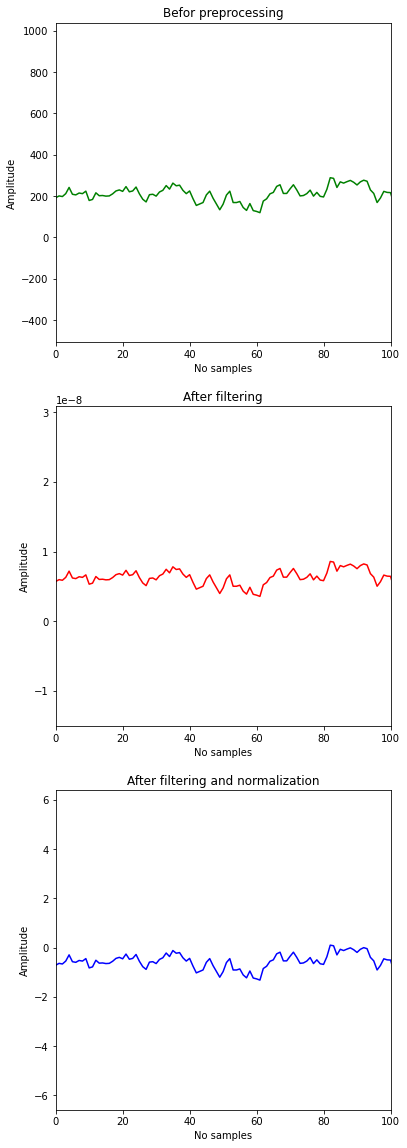

In [21]:
plt.figure(figsize = (6, 20))
plt.title("Electrode C3 for all 8 serries of subject 1",fontsize=20)
plt.subplot(311)
plt.plot(X_train[:,0],'g')
plt.title('Befor preprocessing')
plt.xlim(0, 100)
plt.xlabel('No samples')
plt.ylabel('Amplitude')
plt.savefig('Befor preprocessing.png')

plt.subplot(312)
plt.plot(x_filter[:,0],'r')
plt.title('After filtering')
plt.xlim(0, 100)
plt.xlabel('No samples')
plt.ylabel('Amplitude')
plt.savefig('After filtering.png')

plt.subplot(313)
plt.plot(x_filter_normaliz[:,0],'b')
plt.title('After filtering and normalization')
plt.xlim(0, 100)
plt.xlabel('No samples')
plt.ylabel('Amplitude')
plt.savefig('After filtering and normalization.png')